In [1]:
## Question 1: Use yfinance to Extract Tesla Stock Data
# Install yfinance if not already installed
!pip install yfinance

# Import and extract Tesla stock data
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
# Question 2: Use Webscraping to Extract Tesla Revenue Data
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Initialize the dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find all tables
tables = soup.find_all("table")

# Loop through all tables to find the one containing 'Tesla Quarterly Revenue'
revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Only proceed if the revenue_table is found
if revenue_table:
    for row in revenue_table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                tesla_revenue = pd.concat(
                    [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                    ignore_index=True
                )
else:
    print("Tesla revenue table not found.")

# Display the last five rows
tesla_revenue.tail()


Tesla revenue table not found.


,Date,Revenue


In [3]:
# Question 4: Use Webscraping to Extract GME Revenue Data
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Get the HTML content of GameStop revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Initialize empty dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Search for the table that contains 'GameStop Quarterly Revenue'
revenue_table = None
tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Parse rows if the table was found
if revenue_table:
    for row in revenue_table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                gme_revenue = pd.concat(
                    [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                    ignore_index=True
                )
else:
    print("GameStop revenue table not found.")

# Display the last five rows
gme_revenue.tail()


GameStop revenue table not found.


,Date,Revenue


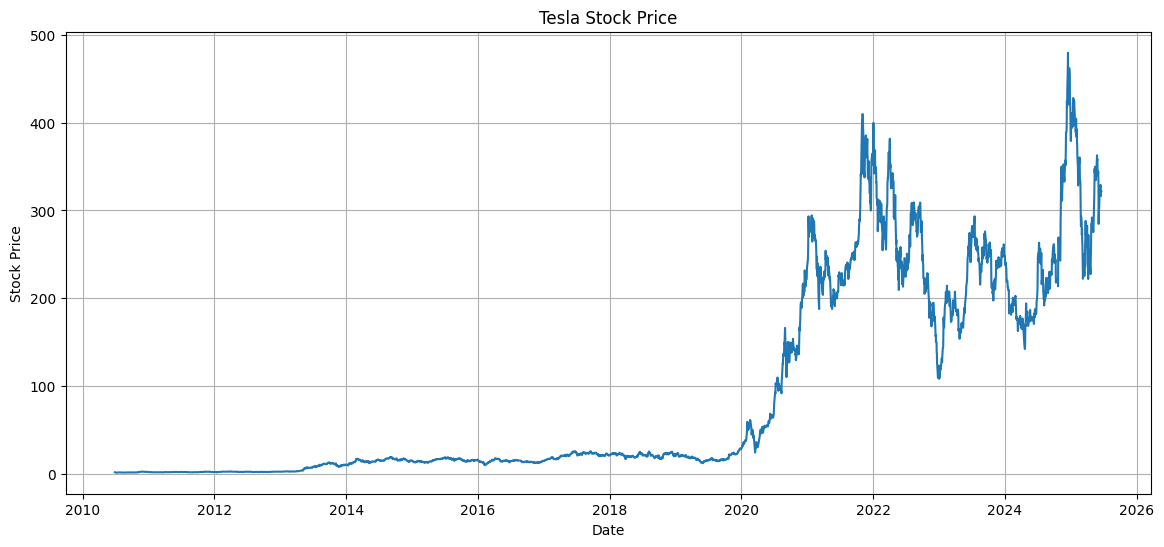

In [4]:
# Question 5: Plot Tesla Stock Graph
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14,6))
    
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax1.set_title(f'{stock_name} Stock Price')
    ax1.grid()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')


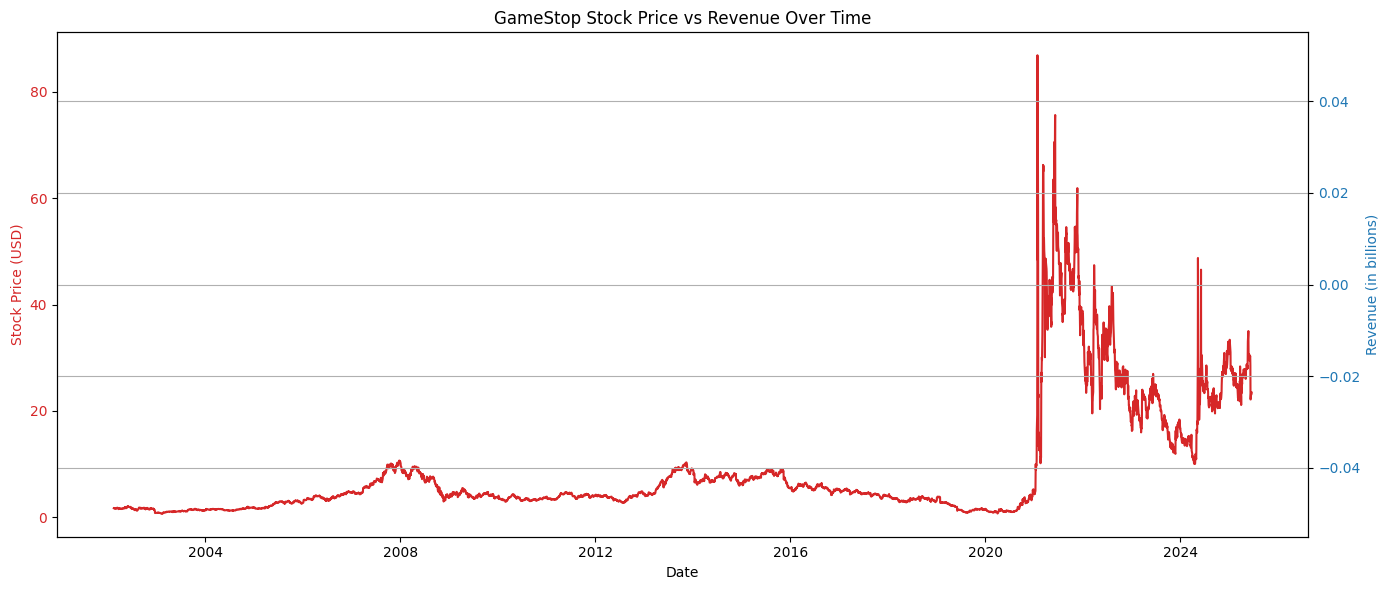

In [8]:
# Question 6: Plot GameStop Stock Graph
# Step 1: Install and import required libraries
# !pip install yfinance --quiet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Step 2: Download GameStop stock data using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Step 3: Scrape GameStop revenue data from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Step 4: Extract the correct table (usually second on the page)
tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if len(tables) >= 2:
    revenue_table = tables[1]

    for row in revenue_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                gme_revenue = pd.concat(
                    [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                    ignore_index=True
                )

# Convert data types for plotting
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Step 5: Define make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:red')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:red', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (in billions)', color='tab:blue')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:blue', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.title(f"{stock_name} Stock Price vs Revenue Over Time")
    plt.grid(True)
    fig.tight_layout()
    plt.show()

# Step 6: Plot the GameStop graph
make_graph(gme_data, gme_revenue, 'GameStop')

